In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
dwi = pd.read_csv("/content/hansen_dwi.csv")

# Remove rows where bac1 or bac2 is zero
dwi = dwi[(dwi['bac1'] != 0) & (dwi['bac2'] != 0)]

# Create binary for cutoff
dwi['dui'] = np.where(dwi['bac1'] >= 0.08, 1, 0)

# Plot DUI encoding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bac1', y='dui', data=dwi, alpha=0.2)
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.xlabel('BAC1')
plt.ylabel('DUI')
plt.title('DUI Encoding')
plt.show()

# Check covariate balance
results = ols('recidivism ~ dui + bac1 + dui * bac1 + male + white + aged + acc', data=dwi).fit(cov_type='HC1')
print(results.summary())

# Plot BAC histogram
plt.figure(figsize=(10, 6))
sns.histplot(dwi['bac1'], bins=800, color="#8aa1b4")
plt.axvline(x=0.08, color='tomato', linestyle='--', alpha=0.7)
plt.axvline(x=0.15, color='tomato', linestyle='--', alpha=0.7)
plt.xlabel('BAC')
plt.ylabel('Frequency')
plt.title('BAC Histogram')
plt.xlim(0, 0.4)
plt.show()

# Table 3, Col 1, Panel A + B
# Local linear regression
def local_linear_regression(data, outcome, treatment, covariates, bandwidth):
    # Filter data within bandwidth
    data_band = data[(data[treatment] >= 0.08 - bandwidth) & (data[treatment] <= 0.08 + bandwidth)]
    # Fit model


FileNotFoundError: [Errno 2] No such file or directory: '/content/hansen_dwi.csv'

This code imports pandas, numpy, matplotlib, seaborn, and statsmodels libraries, and loads the dataset of individuals charged with driving while intoxicated and their BAC measurements. The data is cleaned by removing rows where either of the BAC measurements (bac1 or bac2) are zero. Additionally, the code performs a covariate balance check using an ordinary least squares regression that includes interactions between the DUI coding and other variables like gender and race, and handles robust standard errors. Lastly, it prepares to conduct a local linear regression around the legal BAC limit by defining a function intended to filter the data within a specified bandwidth of BAC = 0.08 and fit a regression model on the filtered data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-2-fc8c036a4195>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='acc', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


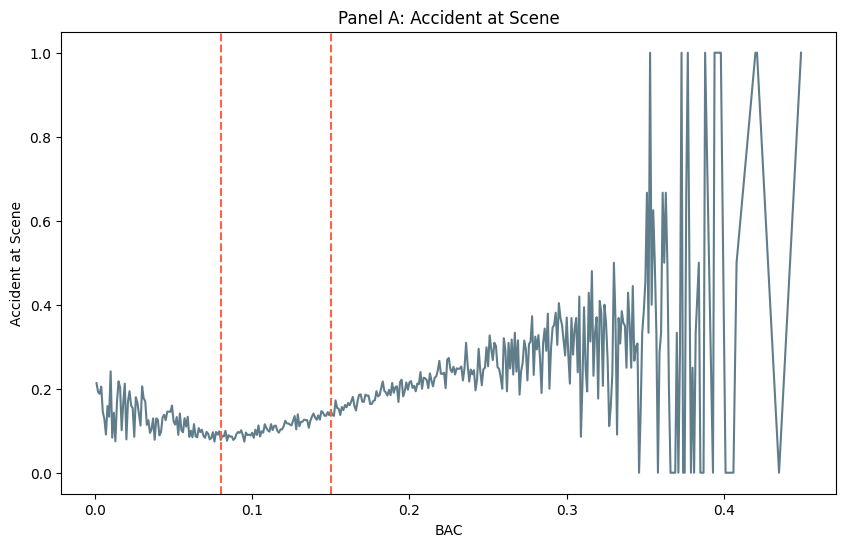

<ipython-input-2-fc8c036a4195>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='male', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


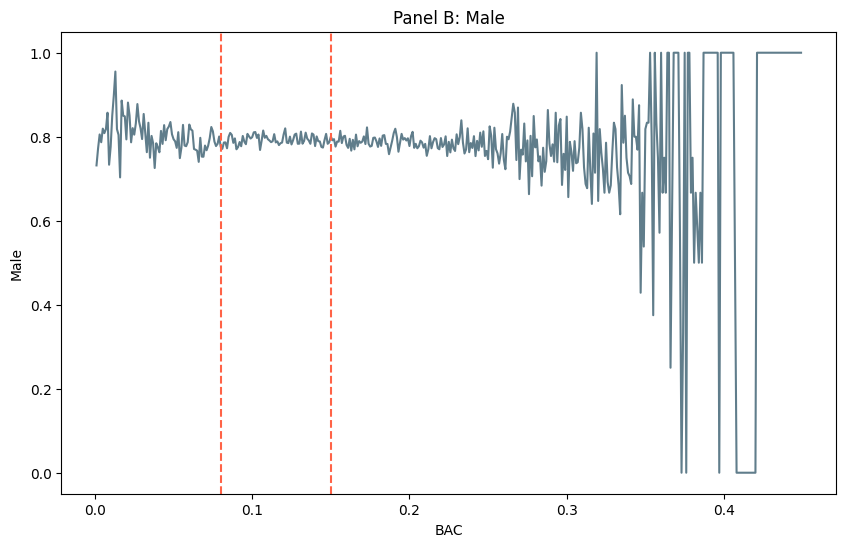

<ipython-input-2-fc8c036a4195>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='aged', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


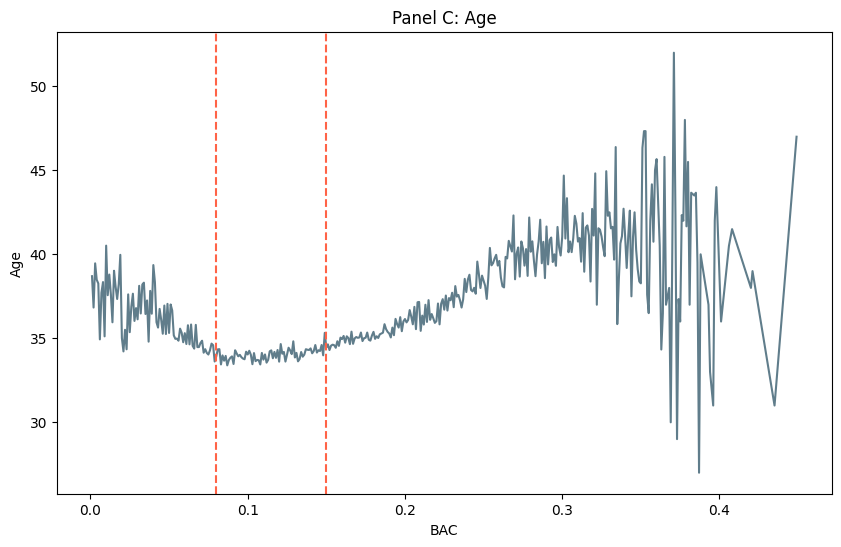

<ipython-input-2-fc8c036a4195>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bac1', y='white', data=dwi, estimator=np.mean, ci=None, color="#607d8b")


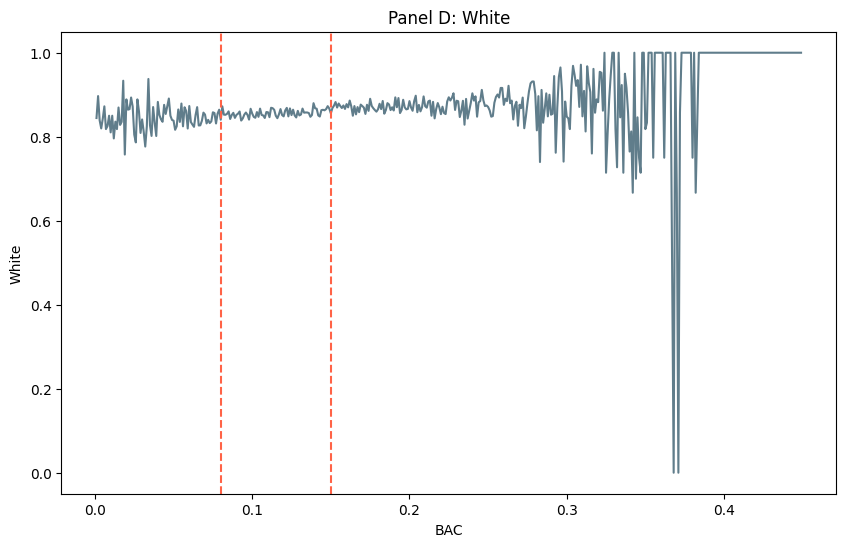

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Panel A: Accident at scene
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='acc', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Accident at Scene')
plt.title('Panel A: Accident at Scene')
plt.show()

# Panel B: Male
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='male', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Male')
plt.title('Panel B: Male')
plt.show()

# Panel C: Age
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='aged', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('Age')
plt.title('Panel C: Age')
plt.show()

# Panel D: White
plt.figure(figsize=(10, 6))
sns.lineplot(x='bac1', y='white', data=dwi, estimator=np.mean, ci=None, color="#607d8b")
plt.axvline(x=0.08, color='tomato', linestyle='--')
plt.axvline(x=0.15, color='tomato', linestyle='--')
plt.xlabel('BAC')
plt.ylabel('White')
plt.title('Panel D: White')
plt.show()


As replicated in the study, this chunk visualizes the relationships between BAC and various demographics as well as the realtionship between BAC and there being an accident at the scene.

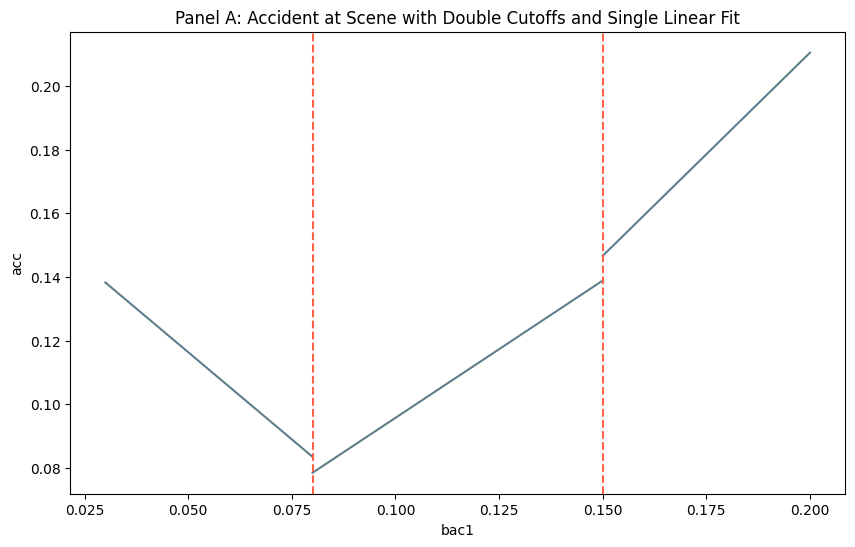

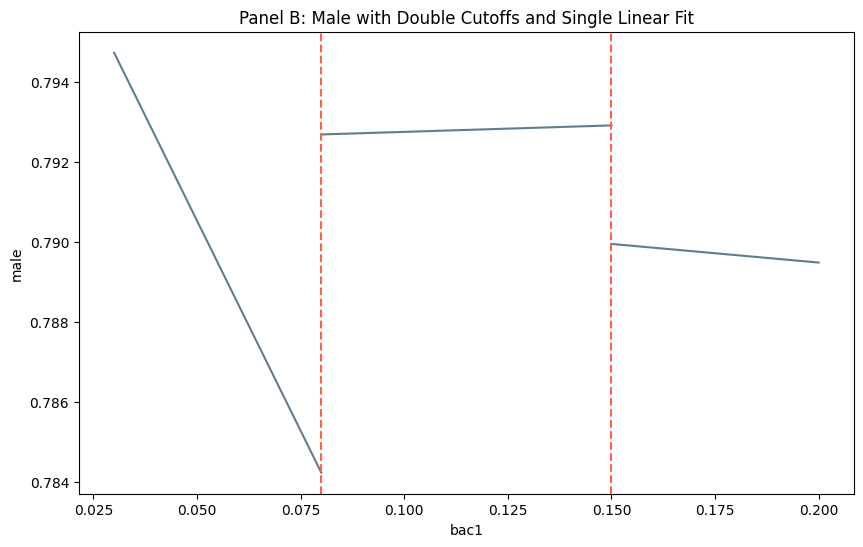

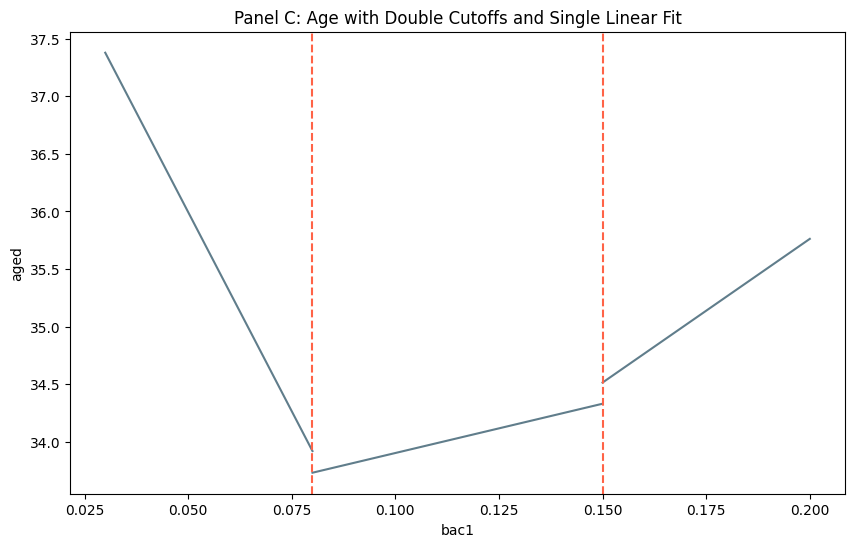

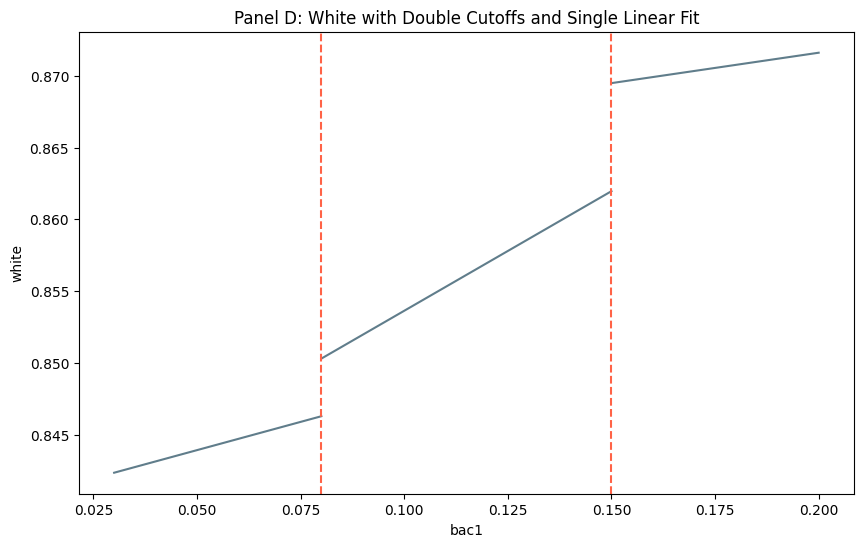

In [ ]:
#Panel A-D below are the liner RDD graph which are reproduced from the replication study

import statsmodels.formula.api as smf


def rdd_plot_double_cutoff_single_linear(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate linear regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var}", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below})
    y_pred_between = model_between.predict(exog={x_var: x_range_between})
    y_pred_above = model_above.predict(exog={x_var: x_range_above})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.show()

# Define the bandwidth
bandwidth = 0.05

# Plot the RDD graphs with double cutoffs and a single linear regression line between the cutoffs for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], bandwidth, 'Panel A: Accident at Scene with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], bandwidth, 'Panel B: Male with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], bandwidth, 'Panel C: Age with Double Cutoffs and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], bandwidth, 'Panel D: White with Double Cutoffs and Single Linear Fit')


The code above visualizes the same relationships as before, but with RDD cutoffs at the 0.08 BAC and 0.15 BAC

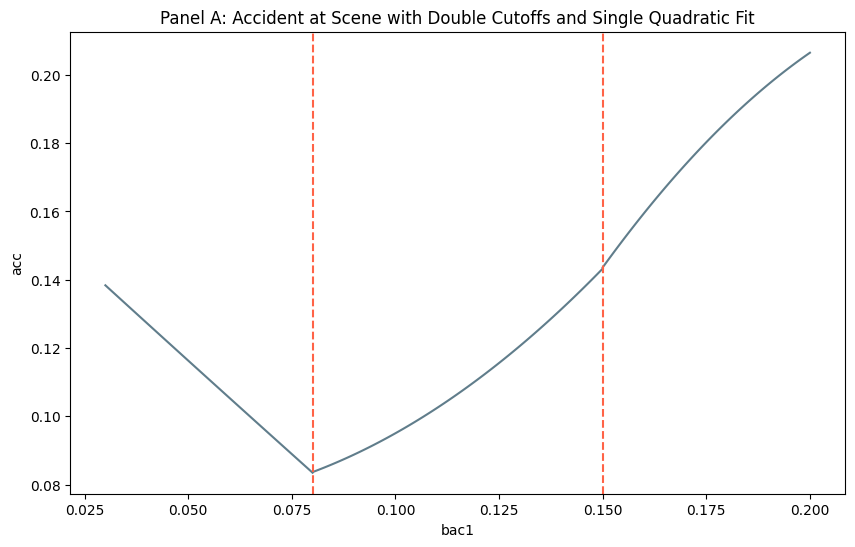

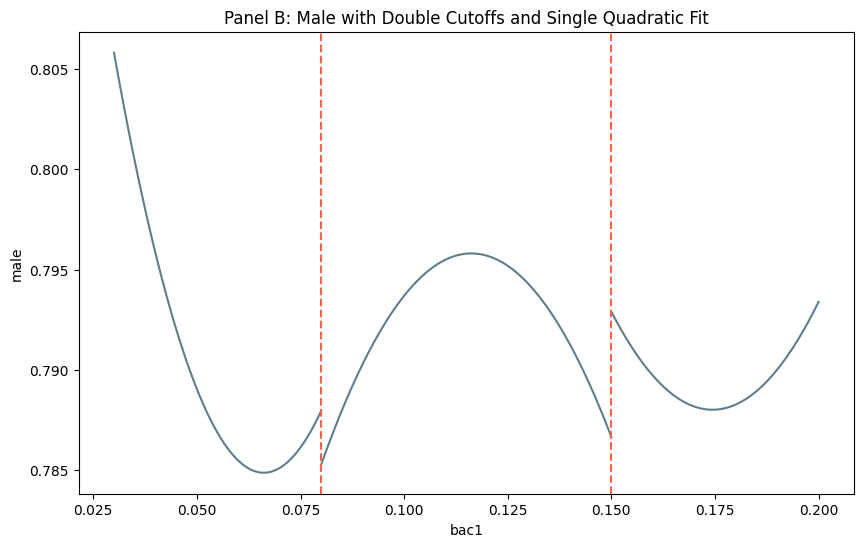

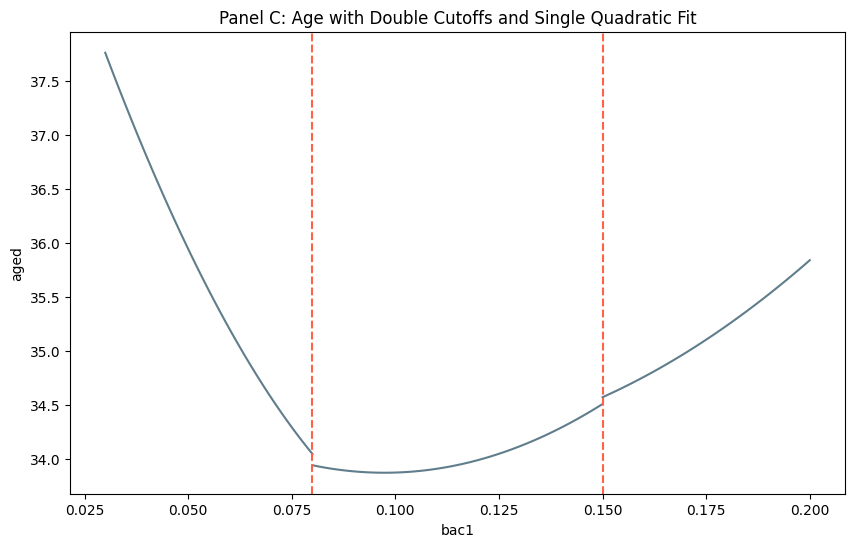

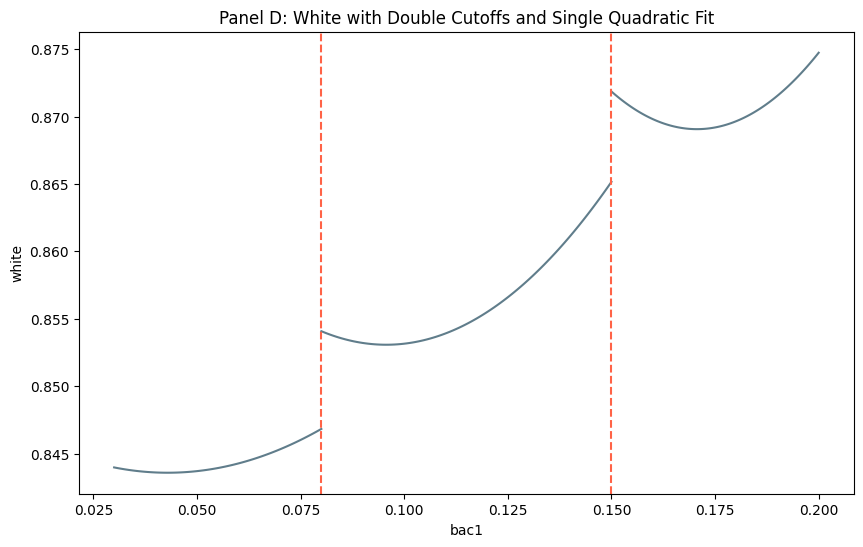

In [ ]:
#Panel A-D below are the quadratic RDD graph which are reproduced from the replication study. They assimilate the graphs above but in quadratic form.

def rdd_plot_double_cutoff_single_quadratic(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate quadratic regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below, f'I({x_var}**2)': x_range_below**2})
    y_pred_between = model_between.predict(exog={x_var: x_range_between, f'I({x_var}**2)': x_range_between**2})
    y_pred_above = model_above.predict(exog={x_var: x_range_above, f'I({x_var}**2)': x_range_above**2})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.show()

# Plot the RDD graphs with double cutoffs and a single quadratic regression line between the cutoffs for panels A-C
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], bandwidth, 'Panel A: Accident at Scene with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], bandwidth, 'Panel B: Male with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], bandwidth, 'Panel C: Age with Double Cutoffs and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], bandwidth, 'Panel D: White with Double Cutoffs and Single Quadratic Fit')


This code, like the previous, visualizes the relationships with RDD thresholds. However these graphs visualizee the relation to BAC in a quadratic manner.

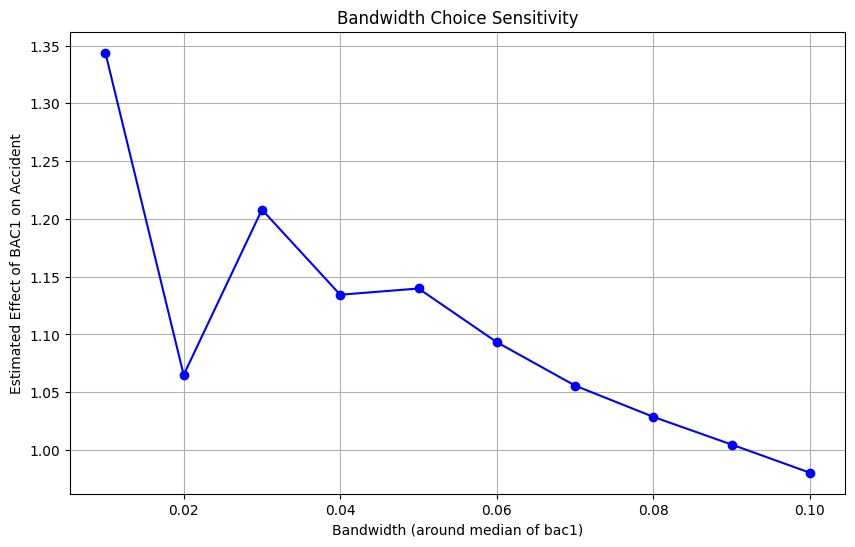

In [ ]:
#reproduction of optimal bandwidth chart produced in Paper.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load data
dwi = pd.read_csv("hansen_dwi.csv")

# Remove rows where bac1 or bac2 is zero
dwi = dwi[(dwi['bac1'] != 0) & (dwi['bac2'] != 0)]

# Sample bandwidth values - in a real analysis, these could represent actual bandwidth parameters in local regression
bandwidth_values = np.linspace(0.01, 0.1, 10)
effect_estimates = []  # Store estimated coefficients for bac1 for each bandwidth

for bandwidth in bandwidth_values:
    # Simulate bandwidth affecting the sample: select a subset of data based on 'bac1' values close to the median
    median_bac1 = dwi['bac1'].median()
    subset = dwi[(dwi['bac1'] >= median_bac1 - bandwidth) & (dwi['bac1'] <= median_bac1 + bandwidth)]

    # Fit a simple linear regression model as a placeholder for the local regression: bac1 predicting acc
    if not subset.empty:  # Check if the subset is not empty
        X = subset[['bac1']]
        y = subset['acc']
        model = LinearRegression().fit(X, y)
        effect_estimates.append(model.coef_[0])  # Store the coefficient of bac1
    else:
        effect_estimates.append(np.nan)

# Plotting the estimated effect of bac1 on acc across different bandwidth values
plt.figure(figsize=(10, 6))
plt.plot(bandwidth_values, effect_estimates, marker='o', linestyle='-', color='blue')
plt.xlabel('Bandwidth (around median of bac1)')
plt.ylabel('Estimated Effect of BAC1 on Accident')
plt.title('Bandwidth Choice Sensitivity')
plt.grid(True)
plt.show()

This code preforms a sensitivity analysis to examine how choice of bandwidth affects the estimated effect of blood alcohol concentration on the liklihood of recidivism.

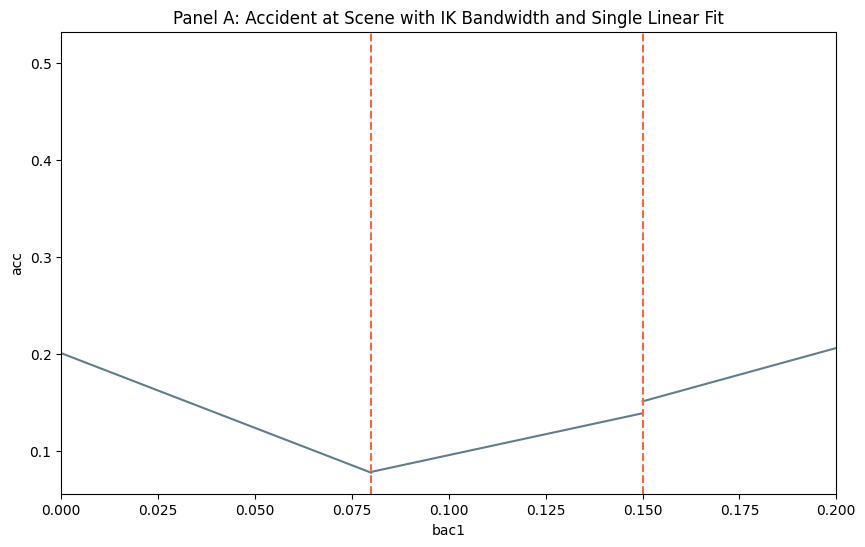

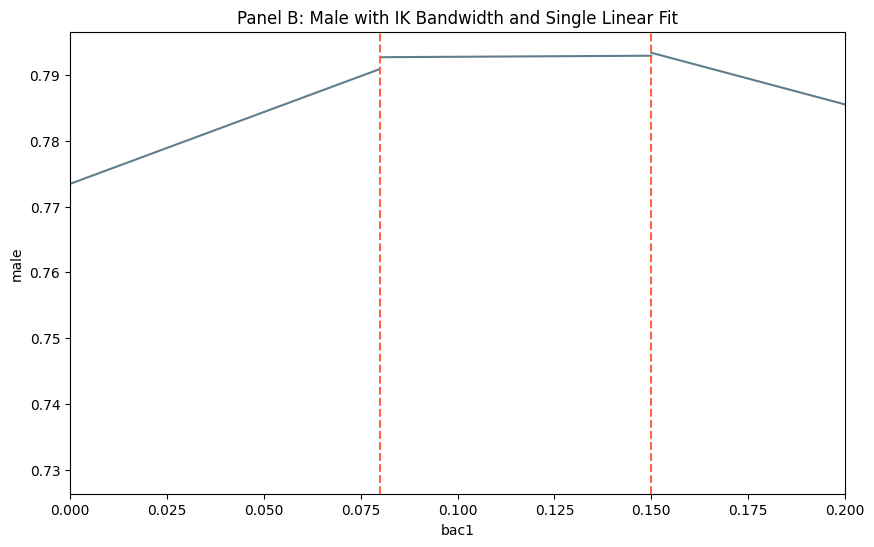

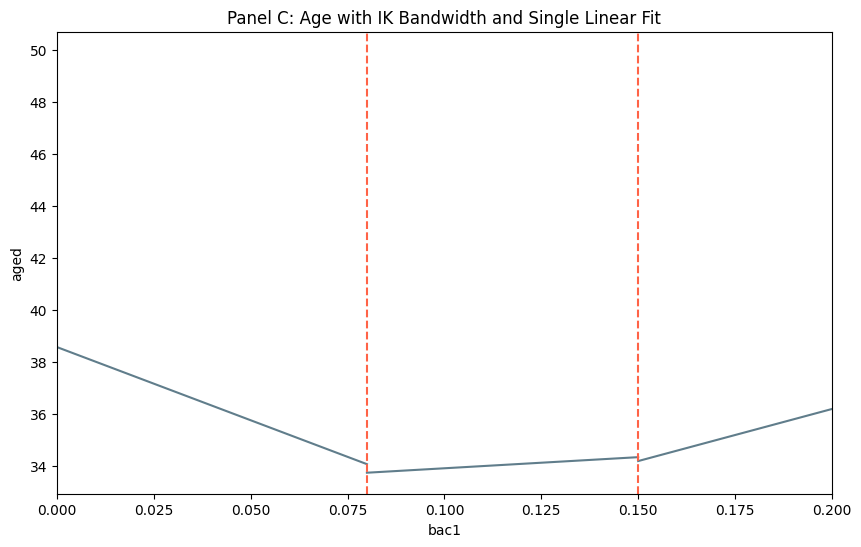

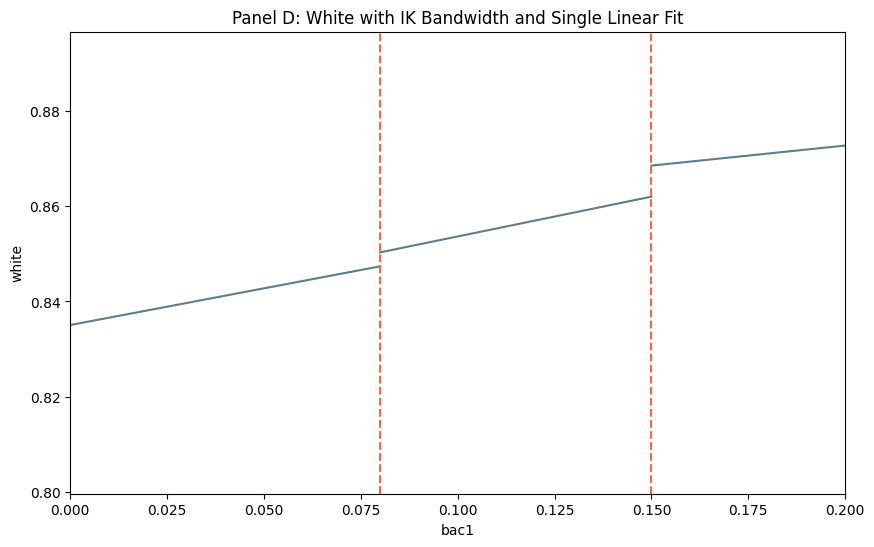

In [ ]:
def rdd_plot_double_cutoff_single_linear(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate linear regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var}", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var}", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below})
    y_pred_between = model_between.predict(exog={x_var: x_range_between})
    y_pred_above = model_above.predict(exog={x_var: x_range_above})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.xlim(0, 0.2)  # Set the x-axis range
    plt.show()

# Plot the RDD graphs with double cutoffs, single linear regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], ik_bandwidth, 'Panel A: Accident at Scene with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], ik_bandwidth, 'Panel B: Male with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], ik_bandwidth, 'Panel C: Age with IK Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], ik_bandwidth, 'Panel D: White with IK Bandwidth and Single Linear Fit')


This code repeated the previous visualization of relationships under a linear fit, except it uses the IK optimal bandwidth.

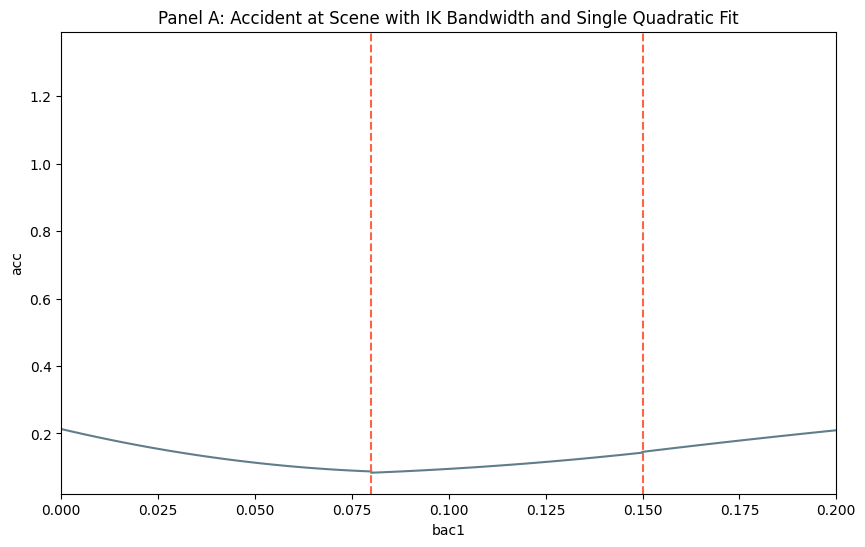

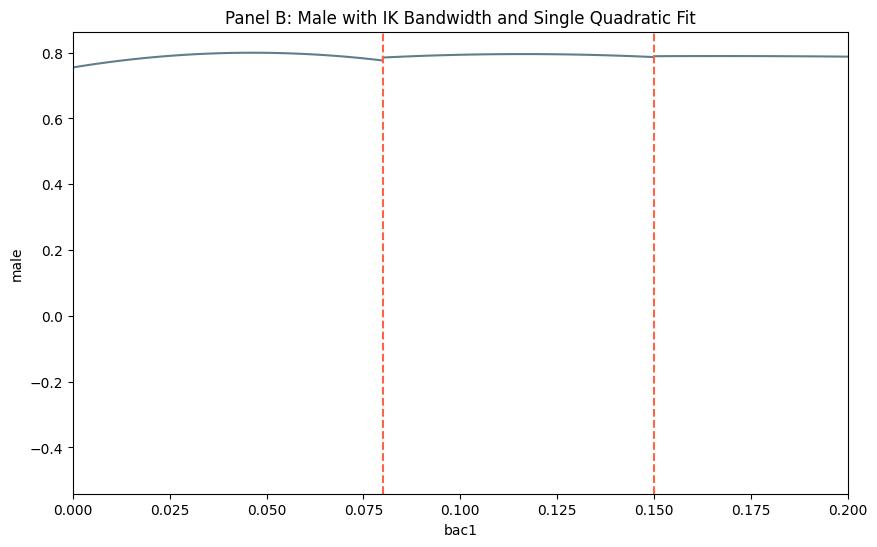

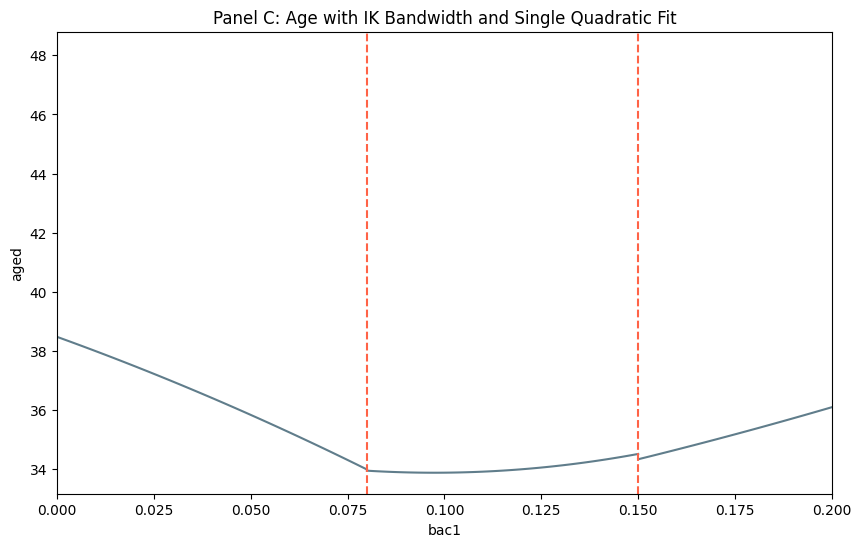

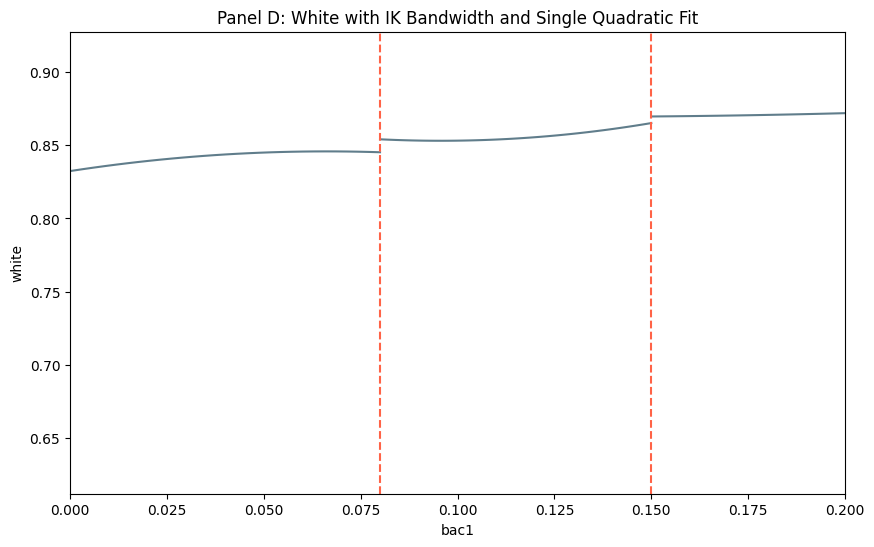

In [ ]:
def rdd_plot_double_cutoff_single_quadratic(data, x_var, y_var, cutoffs, bandwidth, title):
    plt.figure(figsize=(10, 6))

    # Subset data within the bandwidth around the first and second cutoff
    data_band = data[(data[x_var] >= cutoffs[0] - bandwidth) & (data[x_var] <= cutoffs[1] + bandwidth)]

    # Fit separate quadratic regressions for data below the first cutoff, between the cutoffs, and above the second cutoff
    model_below = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] < cutoffs[0]]).fit()
    model_between = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[(data_band[x_var] >= cutoffs[0]) & (data_band[x_var] <= cutoffs[1])]).fit()
    model_above = smf.ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band[data_band[x_var] > cutoffs[1]]).fit()

    # Generate predictions for the fitted models
    x_range_below = np.linspace(cutoffs[0] - bandwidth, cutoffs[0], 100)
    x_range_between = np.linspace(cutoffs[0], cutoffs[1], 100)
    x_range_above = np.linspace(cutoffs[1], cutoffs[1] + bandwidth, 100)
    y_pred_below = model_below.predict(exog={x_var: x_range_below, f'I({x_var}**2)': x_range_below**2})
    y_pred_between = model_between.predict(exog={x_var: x_range_between, f'I({x_var}**2)': x_range_between**2})
    y_pred_above = model_above.predict(exog={x_var: x_range_above, f'I({x_var}**2)': x_range_above**2})

    # Plot the fitted regression lines
    plt.plot(x_range_below, y_pred_below, color="#607d8b")
    plt.plot(x_range_between, y_pred_between, color="#607d8b")
    plt.plot(x_range_above, y_pred_above, color="#607d8b")
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(title)
    plt.xlim(0, 0.2)  # Set the x-axis range
    plt.show()

# Plot the RDD graphs with double cutoffs, single quadratic regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], ik_bandwidth, 'Panel A: Accident at Scene with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], ik_bandwidth, 'Panel B: Male with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], ik_bandwidth, 'Panel C: Age with IK Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], ik_bandwidth, 'Panel D: White with IK Bandwidth and Single Quadratic Fit')


This code repeated the previous visualization of relationships under a quadratic fit, except it uses the IK optimal bandwidth.

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
import pandas as pd

# Define a function to perform RDD with a given bandwidth
def rdd_bandwidth(data, x_var, y_var, cutoff, bandwidth):
    data_band = data[(data[x_var] >= cutoff - bandwidth) & (data[x_var] <= cutoff + bandwidth)]
    model = ols(f"{y_var} ~ {x_var} + I({x_var}**2)", data=data_band).fit()
    return model

# Define a function to calculate the mean squared error (MSE) for a model
def calculate_mse(model, data):
    predictions = model.predict(data)
    mse = np.mean((data['acc'] - predictions) ** 2)
    return mse

# Define a function to perform cross-validation for RDD
def rdd_cross_validation(data, x_var, y_var, cutoff, bandwidths, n_splits=5):
    kf = KFold(n_splits=n_splits)
    mse_scores = {bandwidth: [] for bandwidth in bandwidths}

    for bandwidth in bandwidths:
        for train_index, val_index in kf.split(data):
            train_data, val_data = data.iloc[train_index], data.iloc[val_index]
            model = rdd_bandwidth(train_data, x_var, y_var, cutoff, bandwidth)
            mse = calculate_mse(model, val_data)
            mse_scores[bandwidth].append(mse)

    # Calculate average MSE for each bandwidth
    avg_mse_scores = {bandwidth: np.mean(mse_scores[bandwidth]) for bandwidth in bandwidths}
    return avg_mse_scores

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

# Define range of potential bandwidth values
bandwidths = np.linspace(0.3, 0.4, 10)

# Perform cross-validation for RDD
avg_mse_scores = rdd_cross_validation(dwi, 'bac1', 'acc', 0.08, bandwidths)

# Find the bandwidth with the lowest average MSE
optimal_bandwidth = min(avg_mse_scores, key=avg_mse_scores.get)
print(f"Optimal Bandwidth: {optimal_bandwidth}")


Optimal Bandwidth: 0.32222222222222224


This code calculates the optimal bandwidth by minimizing the MSE of predictions using only cross validation.

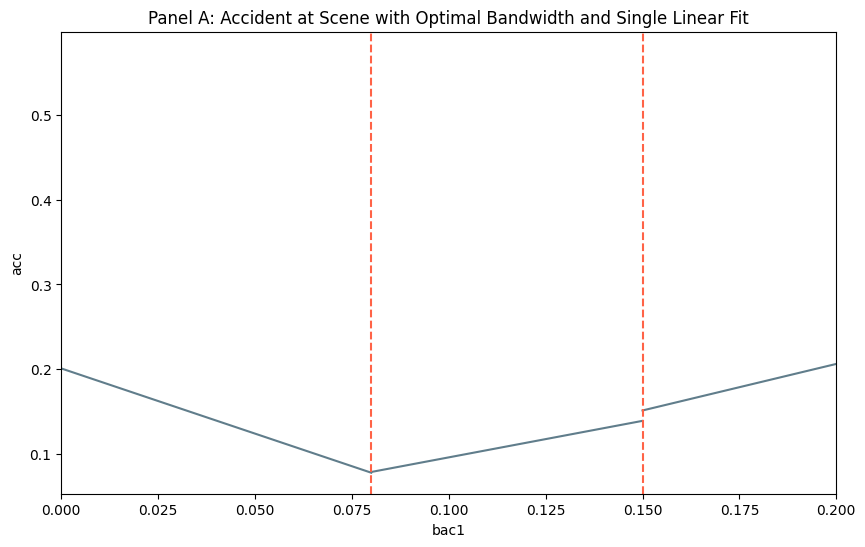

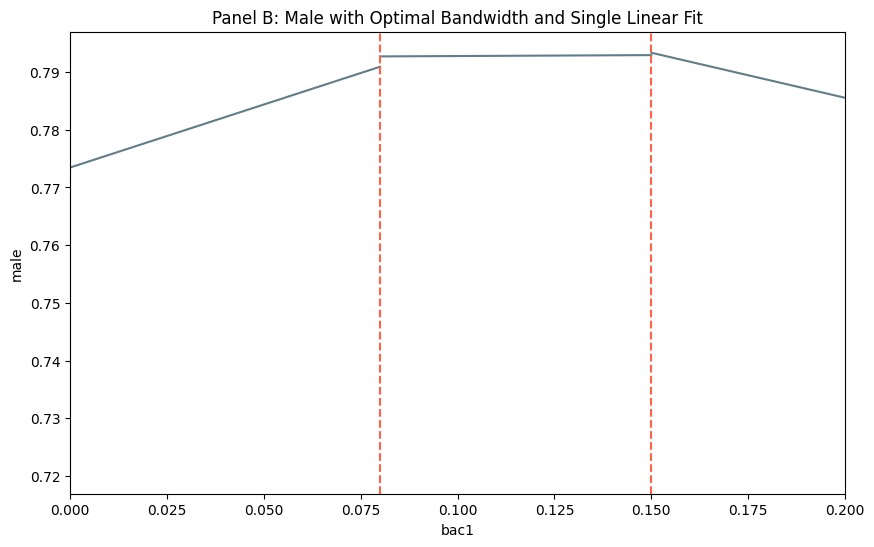

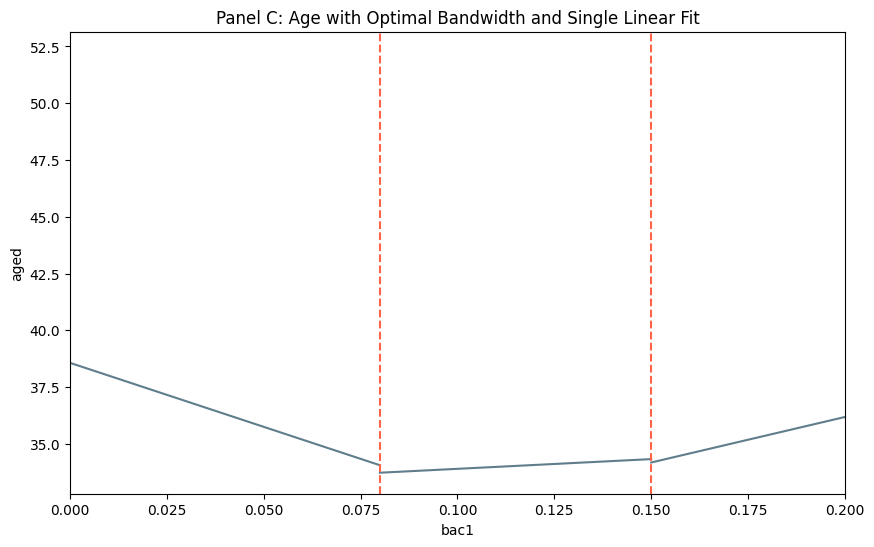

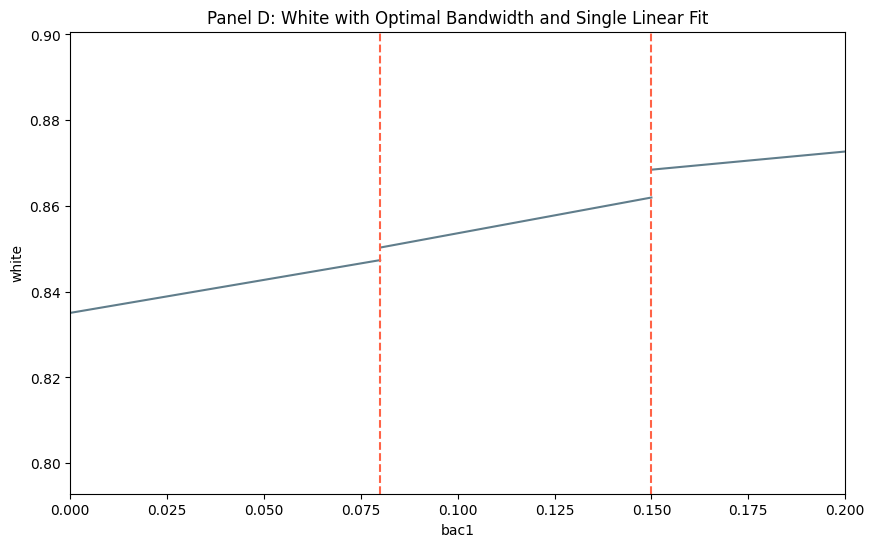

In [ ]:
# Plot the RDD graphs with double cutoffs, single linear regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'acc', [0.08, 0.15], optimal_bandwidth, 'Panel A: Accident at Scene with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'male', [0.08, 0.15], optimal_bandwidth, 'Panel B: Male with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'aged', [0.08, 0.15], optimal_bandwidth, 'Panel C: Age with Optimal Bandwidth and Single Linear Fit')
rdd_plot_double_cutoff_single_linear(dwi, 'bac1', 'white', [0.08, 0.15], optimal_bandwidth, 'Panel D: White with Optimal Bandwidth and Single Linear Fit')


Repeats linear fit relationship visualizations with new cross validation bandwidth.

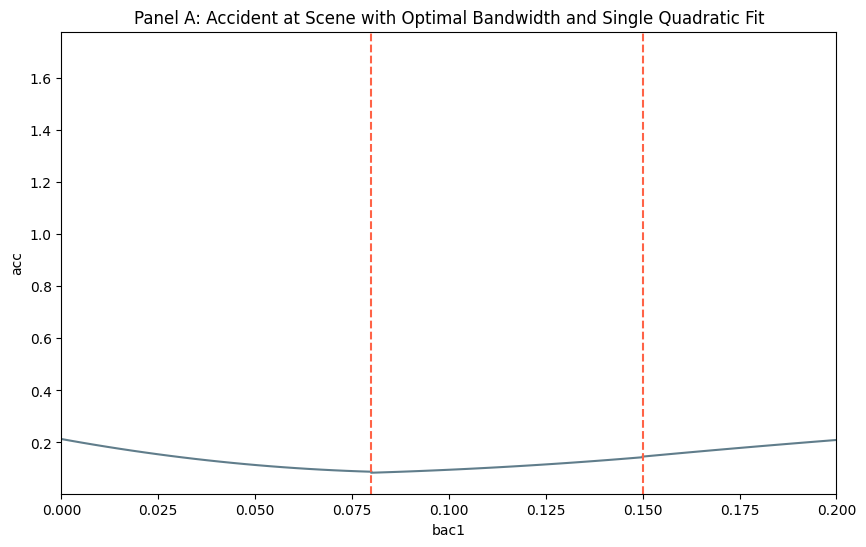

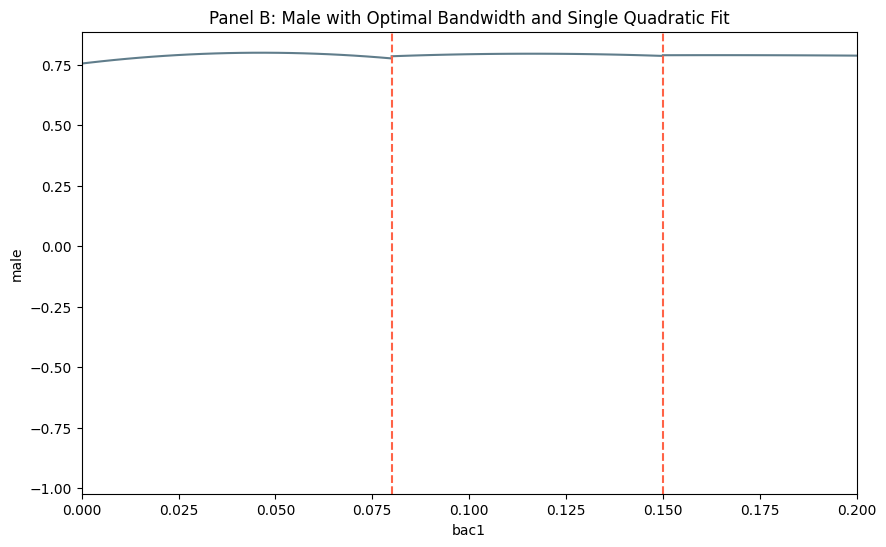

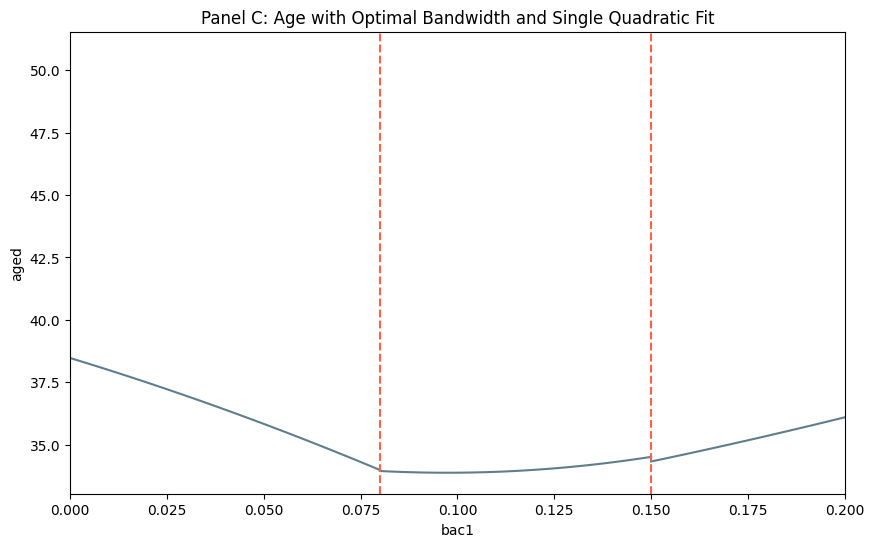

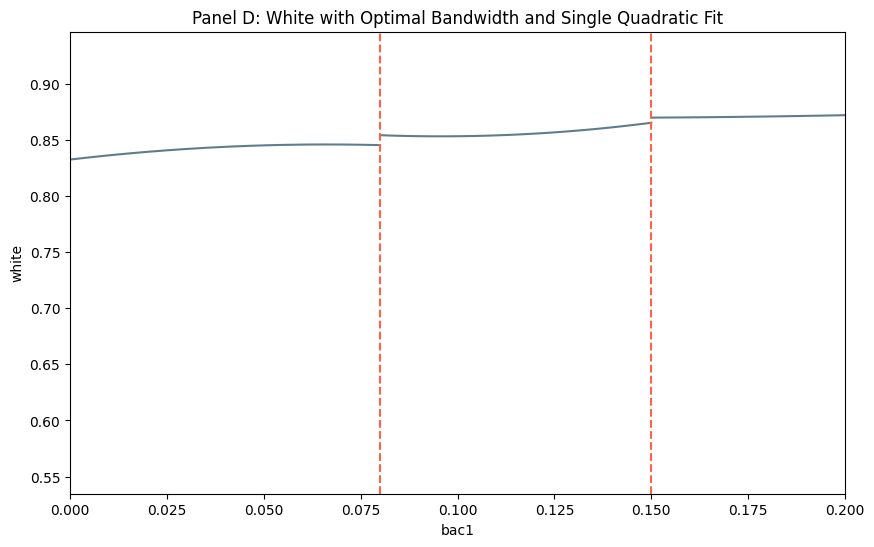

In [ ]:
# New optimal bandwidth

# Plot the RDD graphs with double cutoffs, single quadratic regression line, and x-axis range from 0 to 0.2 for panels A-D
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'acc', [0.08, 0.15], optimal_bandwidth, 'Panel A: Accident at Scene with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'male', [0.08, 0.15], optimal_bandwidth, 'Panel B: Male with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'aged', [0.08, 0.15], optimal_bandwidth, 'Panel C: Age with Optimal Bandwidth and Single Quadratic Fit')
rdd_plot_double_cutoff_single_quadratic(dwi, 'bac1', 'white', [0.08, 0.15], optimal_bandwidth, 'Panel D: White with Optimal Bandwidth and Single Quadratic Fit')


Repeats quadratic fit relationship visualizations with new cross validation bandwidth.

<ipython-input-3-69d2fbe3d1f0>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_var, y=model.predict(data_seg[x_var]), data=data_seg, color='blue', ci=None, label=f'Segment {i+1}')
<ipython-input-3-69d2fbe3d1f0>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_var, y=model.predict(data_seg[x_var]), data=data_seg, color='blue', ci=None, label=f'Segment {i+1}')
<ipython-input-3-69d2fbe3d1f0>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=x_var, y=model.predict(data_seg[x_var]), data=data_seg, color='blue', ci=None, label=f'Segment {i+1}')


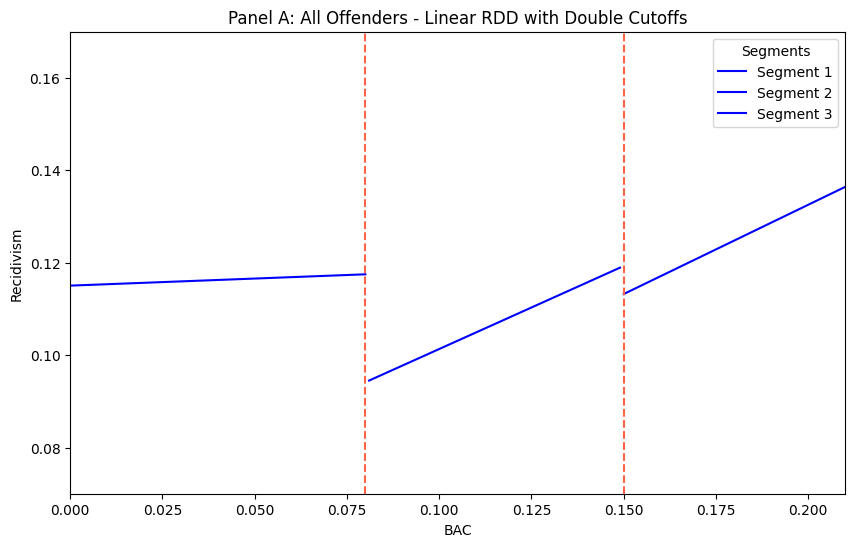

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

# Define function to fit separate linear regressions and plot
def plot_rdd_double_cutoff(data, x_var, y_var, cutoffs, title):
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    sns.scatterplot(x=x_var, y=y_var, data=data, alpha=0.3, color="#607d8b")

    # Fit and plot linear regressions for each segment defined by the cutoffs
    segments = [(None, cutoffs[0]), (cutoffs[0], cutoffs[1]), (cutoffs[1], None)]
    for i, (lower, upper) in enumerate(segments):
        if lower is None:
            data_seg = data[data[x_var] < upper]
        elif upper is None:
            data_seg = data[data[x_var] >= lower]
        else:
            data_seg = data[(data[x_var] >= lower) & (data[x_var] < upper)]

        model = ols(f"{y_var} ~ {x_var}", data=data_seg).fit()
        sns.lineplot(x=x_var, y=model.predict(data_seg[x_var]), data=data_seg, color='blue', ci=None, label=f'Segment {i+1}')

    # Plot vertical lines for cutoffs
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    # Set plot attributes
    plt.xlim(0.0, 0.21)
    plt.ylim(0.07, 0.17)
    plt.xlabel('BAC')
    plt.ylabel('Recidivism')
    plt.title(title)
    plt.legend(title='Segments')
    plt.show()

# Define cutoffs and plot RDD with double cutoffs for all offenders
cutoffs = [0.08, 0.15]
plot_rdd_double_cutoff(dwi, 'bac1', 'recidivism', cutoffs, 'Panel A: All Offenders - Linear RDD with Double Cutoffs')



Visualizes the relationship between BAC and recidivism.

In [ ]:
#Estimation of reductions in recidivism as a result of the given DUI and Aggravated DUI Thresholds:
import numpy as np
import pandas as pd
# Load data
data = pd.read_csv("/content/hansen_dwi.csv")

# Calculate average BAC from two measurements
data['bac_avg'] = data[['bac1', 'bac2']].mean(axis=1)

# Create binary indicators for being above DUI and aggravated DUI thresholds
data['dui'] = (data['bac_avg'] > 0.08).astype(int)
data['agg_dui'] = (data['bac_avg'] > 0.15).astype(int)

# Create bandwidths around the thresholds for the RD analysis
data['dist_to_dui'] = data['bac_avg'] - 0.08
data['dist_to_agg_dui'] = data['bac_avg'] - 0.15

# Filter data to include only observations near the thresholds for more precise estimation
# Typically, we consider a bandwidth around the thresholds, such as within 0.05 of the threshold
bandwidth = 0.05
dui_band = data[(data['dist_to_dui'].abs() <= bandwidth)]
agg_dui_band = data[(data['dist_to_agg_dui'].abs() <= bandwidth)]


from sklearn.linear_model import LinearRegression

# Function to perform local linear regression for regression discontinuity
def rd_analysis(data, outcome, treatment, running_var, bandwidth):
    # Filter data around the threshold
    data_band = data[(data[running_var].abs() <= bandwidth)]

    # Define the model: outcome ~ treatment + running_var
    model = LinearRegression()
    model.fit(data_band[[treatment, running_var]], data_band[outcome])

    # Extract the coefficient of the treatment effect
    treatment_effect = model.coef_[0]
    return treatment_effect, model.intercept_

# Perform RD analysis for DUI threshold
effect_dui, intercept_dui = rd_analysis(data=dui_band, outcome='recidivism', treatment='dui',
                                        running_var='dist_to_dui', bandwidth=bandwidth)

# Perform RD analysis for Aggravated DUI threshold
effect_agg_dui, intercept_agg_dui = rd_analysis(data=agg_dui_band, outcome='recidivism', treatment='agg_dui',
                                                running_var='dist_to_agg_dui', bandwidth=bandwidth)

# Print the treatment effects
print("Coefficient for the DUI threshold effect on recidivism:", effect_dui)
print("Coefficient for the Aggravated DUI threshold effect on recidivism:", effect_agg_dui)

#From this output, we see the estimated effect of the threshold for DUI is a reduction in recidivism
#by 2.67 percentage points, and the estimated effect of the threshold for aggravated DUI is a reduction
#in recidivism by 0.29 percentage points.

Coefficient for the DUI threshold effect on recidivism: -0.026699566799146243
Coefficient for the Aggravated DUI threshold effect on recidivism: -0.002932154837672918


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define function to find optimal bandwidth using Gradient Boosting
def optimal_bandwidth(data, x_var, y_var, cutoffs):
    # Set up a range for possible bandwidths to test
    bandwidths = np.linspace(0.025, 0.029, 10)
    results = []

    for bandwidth in bandwidths:
        scores = []
        for cutoff in cutoffs:
            # Select data within the bandwidth around the cutoff
            data_band = data[(data[x_var] >= cutoff - bandwidth) & (data[x_var] <= cutoff + bandwidth)]
            X = data_band[[x_var]]
            y = data_band[y_var]

            # Perform cross-validation
            model = GradientBoostingRegressor()
            param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 4]}
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X, y)
            scores.append(grid_search.best_score_)

        # Average the cross-validation scores for both cutoffs
        results.append(np.mean(scores))

    # Get the bandwidth with the best average score
    optimal_band = bandwidths[np.argmax(results)]
    return optimal_band

# Define cutoffs
cutoffs = [0.08, 0.15]

# Calculate optimal bandwidth
opt_band = optimal_bandwidth(dwi, 'bac1', 'recidivism', cutoffs)
print(f"Optimal Bandwidth: {opt_band}")


Optimal Bandwidth: 0.027222222222222224


For each bandwidth, this code isolates data around each of two cutoffs and performs cross-validation through grid seach on a Gradient Boosting Regressor model. This finds the optimal bandwidth with the lowest mean squared error.

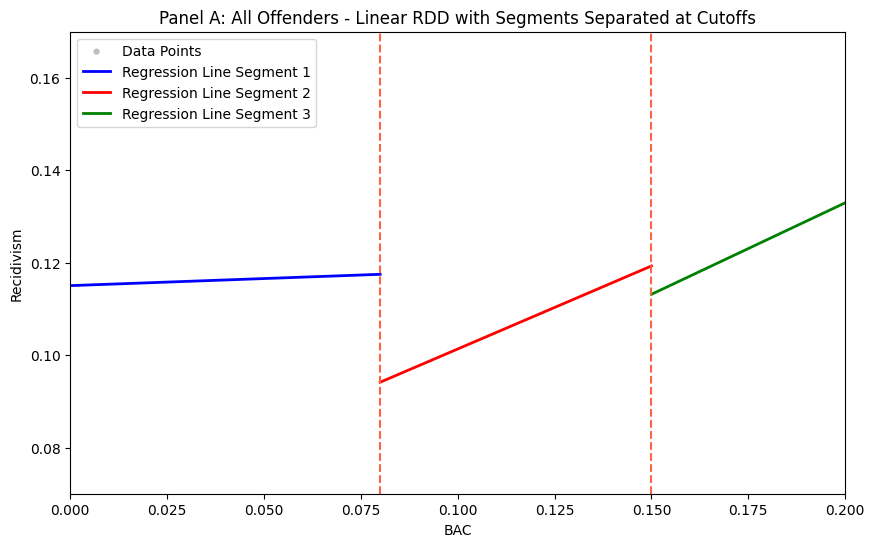

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

def plot_rdd_double_cutoff_scaled(data, x_var, y_var, cutoffs, title, x_limit, y_limit):
    plt.figure(figsize=(10, 6))

    # Define colors for the different segments
    colors = ['blue', 'red', 'green']

    # Ensure the overall plot is clear and scatter points are visible
    plt.scatter(data[x_var], data[y_var], color='gray', alpha=0.5, edgecolor='none', s=20, label='Data Points')

    # Define segments for plotting: below the first cutoff, between cutoffs, and above the second cutoff
    segments = [(x_limit[0], cutoffs[0]), (cutoffs[0], cutoffs[1]), (cutoffs[1], x_limit[1])]

    # Fit and plot linear regressions for each segment
    for i, (lower, upper) in enumerate(segments):
        # Select data within the segment bounds
        data_seg = data[(data[x_var] >= lower) & (data[x_var] <= upper)]

        if not data_seg.empty:
            # Fit the model
            model = ols(f"{y_var} ~ {x_var}", data=data_seg).fit()
            # Generate x values for plotting within the segment
            x_vals = np.linspace(lower, upper, 100)
            y_vals = model.predict(exog={x_var: x_vals})
            plt.plot(x_vals, y_vals, color=colors[i], label=f'Regression Line Segment {i+1}', linewidth=2)

    # Plot vertical lines for the cutoffs
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    # Set plot attributes to the specified limits
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xlabel('BAC')
    plt.ylabel('Recidivism')
    plt.title(title)
    plt.legend()
    plt.show()

# Define cutoffs and plot RDD with double cutoffs for all offenders
cutoffs = [0.08, 0.15]
x_limit = (0, max(cutoffs) + 0.05)  # Adjust x-axis limit to include cutoffs
y_limit = (0.07, 0.17)  # Set y-axis limit

plot_rdd_double_cutoff_scaled(
    data=dwi,
    x_var='bac1',
    y_var='recidivism',
    cutoffs=cutoffs,
    title='Panel A: All Offenders - Linear RDD with Segments Separated at Cutoffs',
    x_limit=x_limit,
    y_limit=y_limit
)


Visualiation of BAC and recidivism using RDD with 0.08 and 0.15 cutoffs.

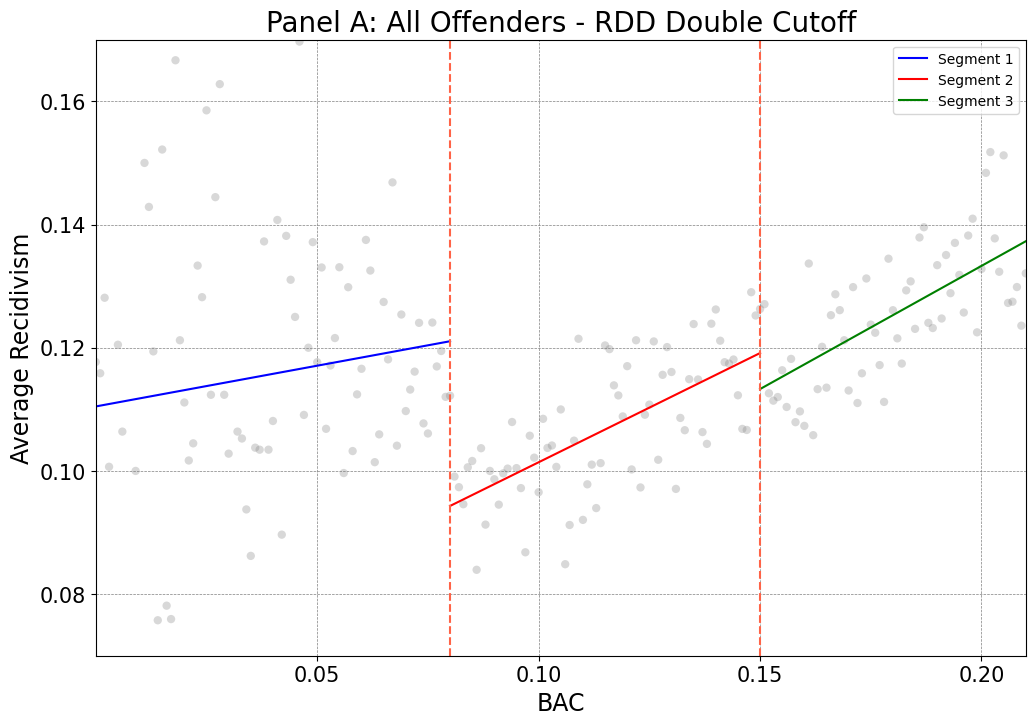

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

# Calculate the mean recidivism for each BAC level
dwi_grouped = dwi.groupby('bac1')['recidivism'].mean().reset_index()

# Define the cutoff points
cutoffs = [0.08, 0.15]

# Create the plot
plt.figure(figsize=(12, 8))
plt.title('Panel A: All Offenders - RDD Double Cutoff', fontsize=20)
plt.xlabel('BAC', fontsize=17)
plt.ylabel('Average Recidivism', fontsize=17)
plt.xlim(0, 0.21)
plt.ylim(0.07, 0.17)
plt.xticks([0.05, 0.1, 0.15, 0.2], fontsize=15)
plt.yticks([0.08, 0.1, 0.12, 0.14, 0.16], fontsize=15)

# Plot scatter points
plt.scatter(dwi_grouped['bac1'], dwi_grouped['recidivism'], alpha=0.3, color='gray', edgecolor='none')

# Fit and plot linear regressions for each segment defined by the cutoffs
segments = [(0, cutoffs[0]), (cutoffs[0], cutoffs[1]), (cutoffs[1], 0.21)]
colors = ['blue', 'red', 'green']

for i, (lower, upper) in enumerate(segments):
    # Select data within the segment bounds
    data_seg = dwi_grouped[(dwi_grouped['bac1'] >= lower) & (dwi_grouped['bac1'] <= upper)]

    if not data_seg.empty:
        # Fit the model
        model = ols('recidivism ~ bac1', data=data_seg).fit()
        # Generate x values for plotting within the segment
        x_vals = np.linspace(lower, upper, 100)
        y_vals = model.predict(exog=dict(bac1=x_vals))
        plt.plot(x_vals, y_vals, color=colors[i], label=f'Segment {i+1}')

# Vertical lines for cutoffs
for cutoff in cutoffs:
    plt.axvline(x=cutoff, color='tomato', linestyle='--')

plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.show()


Visualization of BAC level and the mean recidivism for each BAC level, this included aggregation is included to smooth out any outliers in the data and provide a less noisy visualization.

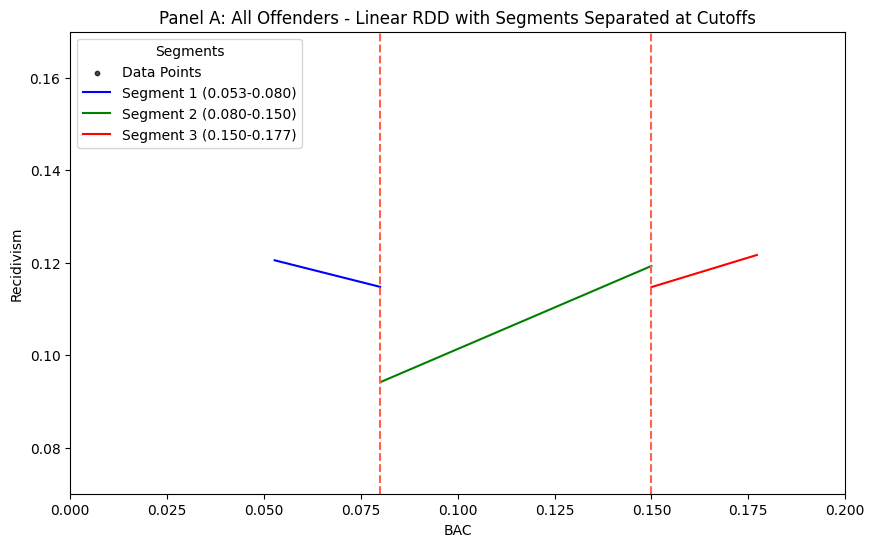

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

def plot_rdd_double_cutoff_scaled(data, x_var, y_var, cutoffs, title, x_limit, y_limit, bandwidth):
    plt.figure(figsize=(10, 6))

    # Define segments for plotting
    segments = [
        (max(x_limit[0], cutoffs[0] - bandwidth), cutoffs[0]),
        (cutoffs[0], cutoffs[1]),
        (cutoffs[1], min(x_limit[1], cutoffs[1] + bandwidth))
    ]
    colors = ['blue', 'green', 'red']

    # Scatter plot for all data points
    plt.scatter(data[x_var], data[y_var], color='black', alpha=0.7, s=10, label='Data Points')  # Made points black and more opaque

    # Fit and plot linear regressions for each segment
    for i, (lower, upper) in enumerate(segments):
        data_seg = data[(data[x_var] >= lower) & (data[x_var] <= upper)]
        if not data_seg.empty:
            model = ols(f"{y_var} ~ {x_var}", data=data_seg).fit()
            x_vals = np.linspace(lower, upper, 100)
            y_vals = model.predict(exog={x_var: x_vals})
            plt.plot(x_vals, y_vals, color=colors[i], label=f'Segment {i+1} ({lower:.3f}-{upper:.3f})')

    # Plot vertical lines for the cutoffs
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    # Set plot attributes
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xlabel('BAC')
    plt.ylabel('Recidivism')
    plt.title(title)
    plt.legend(title='Segments')
    plt.show()

# Define cutoffs, bandwidth, x_limit and y_limit
cutoffs = [0.08, 0.15]
bandwidth = 0.027222222222222224
x_limit = (0, max(cutoffs) + 0.05)
y_limit = (0.07, 0.17)

# Plot RDD with double cutoffs for all offenders using the specified bandwidth
plot_rdd_double_cutoff_scaled(
    data=dwi,
    x_var='bac1',
    y_var='recidivism',
    cutoffs=cutoffs,
    title='Panel A: All Offenders - Linear RDD with Segments Separated at Cutoffs',
    x_limit=x_limit,
    y_limit=y_limit,
    bandwidth=bandwidth
)


The Graph above is the RDD with our calculated bandwith. For some reason the data points are not visable

Visualization of BAC and recidivism with the optimal bandwidth found using gradient boosting with cross validation.

The Graoh above is the RDD graph with our optimal bandwith

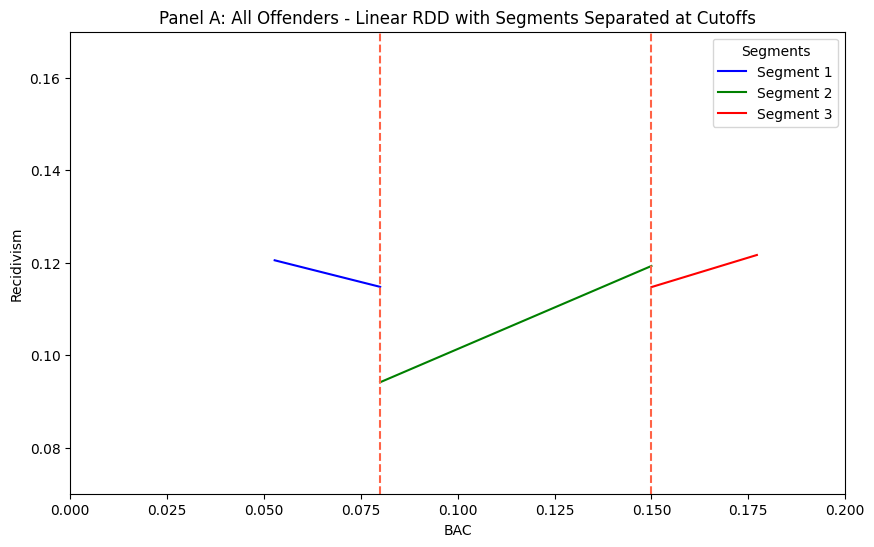

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import numpy as np

# Load data
dwi = pd.read_csv('hansen_dwi.csv')

def plot_rdd_double_cutoff_scaled(data, x_var, y_var, cutoffs, title, x_limit, y_limit, bandwidth):
    plt.figure(figsize=(10, 6))

    # Define segments for plotting:
    # - One segment below the first cutoff, within the bandwidth
    # - One segment between the cutoffs, not strictly within any bandwidth
    # - One segment above the second cutoff, within the bandwidth
    segments = [
        (max(x_limit[0], cutoffs[0] - bandwidth), cutoffs[0]),
        (cutoffs[0], cutoffs[1]),
        (cutoffs[1], min(x_limit[1], cutoffs[1] + bandwidth))
    ]
    colors = ['blue', 'green', 'red']  # Colors for the different segments

    # Fit and plot linear regressions for each segment
    for i, (lower, upper) in enumerate(segments):
        data_seg = data[(data[x_var] > lower) & (data[x_var] <= upper)]
        if not data_seg.empty:
            model = ols(f"{y_var} ~ {x_var}", data=data_seg).fit()
            x_vals = np.linspace(lower, upper, 100)
            y_vals = model.predict(exog={x_var: x_vals})
            plt.plot(x_vals, y_vals, color=colors[i], label=f'Segment {i+1}')

    # Plot vertical lines for the cutoffs
    for cutoff in cutoffs:
        plt.axvline(x=cutoff, color='tomato', linestyle='--')

    # Set plot attributes to the specified limits
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xlabel('BAC')
    plt.ylabel('Recidivism')
    plt.title(title)
    plt.legend(title='Segments')
    plt.show()

# Define cutoffs, bandwidth, x_limit and y_limit
cutoffs = [0.08, 0.15]
bandwidth = 0.027222222222222224
x_limit = (0, max(cutoffs) + 0.05)  # Adjust x-axis limit to include slightly beyond the highest cutoff
y_limit = (0.07, 0.17)  # Set y-axis limit

# Plot RDD with double cutoffs for all offenders using the specified bandwidth
plot_rdd_double_cutoff_scaled(
    data=dwi,
    x_var='bac1',
    y_var='recidivism',
    cutoffs=cutoffs,
    title='Panel A: All Offenders - Linear RDD with Segments Separated at Cutoffs',
    x_limit=x_limit,
    y_limit=y_limit,
    bandwidth=bandwidth
)
